Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

In [2]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'

# Decision Trees

## Kaggle

**Task 1:** [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website (the URL is in Slack). Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.

## Wrangle Data

**Task 2:** Add to the code below so that `id` is set as the index for `df`.

In [21]:
import pandas as pd

df = pd.merge(pd.read_csv(DATA_PATH + 'waterpumps/train_features.csv', parse_dates=['date_recorded'],
                             na_values=[0, -2.000000e-08]),
              pd.read_csv(DATA_PATH + 'waterpumps/train_labels.csv'))
# YOUR CODE HERE
df.set_index('id', inplace=True)
df['date_recorded'] = df['date_recorded'].dt.year
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572.0,6000.0,2011,Roman,1390.0,Roman,34.938093,-9.856322,none,NaN,Lake Nyasa,Mnyusi B,Iringa,11,5.0,Ludewa,Mundindi,109.0,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776.0,NaN,2013,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,NaN,Lake Victoria,Nyamara,Mara,20,2.0,Serengeti,Natta,280.0,NaN,GeoData Consultants Ltd,Other,NaN,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310.0,25.0,2013,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,NaN,Pangani,Majengo,Manyara,21,4.0,Simanjiro,Ngorika,250.0,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743.0,NaN,2013,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,NaN,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63.0,Nanyumbu,Nanyumbu,58.0,True,GeoData Consultants Ltd,VWC,NaN,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728.0,NaN,2011,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,NaN,Lake Victoria,Kyanyamisa,Kagera,18,1.0,Karagwe,Nyakasimbi,NaN,True,GeoData Consultants Ltd,NaN,NaN,True,NaN,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


**Test 2**

In [22]:
'''Task 2 Testing'''

assert isinstance(df, pd.DataFrame), 'Have you created the DataFrame `df`?'
assert df.shape == (59399, 40), '`df` is the wrong shape. Did you set the index to `id`?'
assert 69572 in df.index, 'The index for `df` is has the wrong values. Did you set the index to `id`?'

## Split Data

**Task 3:** Create your target vector `y` and feature matrix `X`.

In [23]:
target = 'status_group'

# YOUR CODE HERE
X = df.drop(columns=[target])
y = df[target]

print(X)
print(y)

         amount_tsh  ...  waterpoint_type_group
id                   ...                       
69572.0      6000.0  ...     communal standpipe
8776.0          NaN  ...     communal standpipe
34310.0        25.0  ...     communal standpipe
67743.0         NaN  ...     communal standpipe
19728.0         NaN  ...     communal standpipe
...             ...  ...                    ...
60739.0        10.0  ...     communal standpipe
27263.0      4700.0  ...     communal standpipe
37057.0         NaN  ...              hand pump
31282.0         NaN  ...              hand pump
26348.0         NaN  ...              hand pump

[59399 rows x 39 columns]
id
69572.0        functional
8776.0         functional
34310.0        functional
67743.0    non functional
19728.0        functional
                ...      
60739.0        functional
27263.0        functional
37057.0        functional
31282.0        functional
26348.0        functional
Name: status_group, Length: 59399, dtype: object


**Test 3**

In [25]:
'''Task 3 Testing'''

assert isinstance(X, pd.DataFrame), '`X` is the wrong data type.'
assert isinstance(y, pd.Series), '`y` is the wrong data type.'
assert y.shape == (59399,), '`y` is the wrong shape.'
assert X.shape == (59399,39), '`X` is the wrong shape.'

We already have a test set for this model, the `test.csv` that you'll use to make the predictions you'll upload to Kaggle. However, since our competition only allows for 2 submissions per day, we need a way to estimate our training error so that we can quickly iterate and improve our model. We can achieve this by creating a validation set from the data we have.

**Task 4:** Split `X` and `y` into training and validation sets. Your validation set should be 20% of the data you have. You should have four variables: `X_train`, `X_val`, `y_train`, and `y_val`. 

In [27]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=11)

print(X_train)
print(X_val)
print(y_train)
print(y_val)

         amount_tsh  ...  waterpoint_type_group
id                   ...                       
5571.0          NaN  ...     communal standpipe
13692.0         NaN  ...     communal standpipe
11420.0         NaN  ...     communal standpipe
54771.0         NaN  ...     communal standpipe
66367.0        50.0  ...     communal standpipe
...             ...  ...                    ...
62777.0       500.0  ...              hand pump
66608.0        20.0  ...     communal standpipe
6695.0         50.0  ...     communal standpipe
20331.0         NaN  ...     communal standpipe
44468.0       500.0  ...     communal standpipe

[47519 rows x 39 columns]
         amount_tsh  ...  waterpoint_type_group
id                   ...                       
37610.0         NaN  ...     communal standpipe
32732.0      2400.0  ...     communal standpipe
54483.0         NaN  ...     communal standpipe
1779.0          NaN  ...              hand pump
44118.0         NaN  ...              hand pump
...          

**Test 4**

In [29]:
'''Task 4 Testing'''

assert X_train.shape == (47519, 39), '`X_train` is the wrong shape.'
assert X_val.shape == (11880, 39), '`X_val` is the wrong shape.'
assert y_train.shape == (47519,), '`y_train` is the wrong shape.'
assert y_val.shape == (11880,), '`y_val` is the wrong shape.'

## Establish Baseline

**Task 5:** This is a **classification** problem, so you need to establish the baseline accuracy for your training set. Find the majority class for `y_train` and calculate the percentage of labels in `y_train` belonging to that class. Assign your answer to the variable name `baseline_acc`.

In [31]:
# YOUR CODE HERE
baseline_acc = y_train.value_counts(normalize=True).max()

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5429617626633557


**Task 5**

In [32]:
'''Task 5 Testing'''

assert isinstance(baseline_acc, float), '`baseline_acc` should be a `float`.'
assert 0.0 <= baseline_acc <= 1.0, '`baseline_acc` is a score that should be between 0 and 1.'

## Build Model

**Task 6:** Create a model named `model` and train it with your training data. Your model should be a pipeline with (a) transformers that you think are appropriate to this dataset and (b) a `DecisionTreeClassifier` as your predictor. **Tip:** How can you transform categorical features and missing values in order to train your model?

In [34]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=11)
)

model.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Test 6**

In [35]:
'''Task 6 Testing'''

assert len(model) > 1, 'Your model pipeline should have multiple steps.'
assert isinstance(model[-1], DecisionTreeClassifier), 'Your pipline should end in a `DecisionTreeClassifier`.'
assert hasattr(model, 'classes_'), 'Have you fit your model?'

## Check Metrics

**Task 7:** Calculate the training and validation accuracy of your model, and assign them to the valiables `training_acc` and `validation_acc`, respectively. Your validation accuracy should be greater than your baseline accuracy.

In [38]:
# YOUR CODE HERE
training_acc = model.score(X_train, y_train)
validation_acc = model.score(X_val, y_val)

print('Training Accuracy:', training_acc)
print('Validation Accuracy:', validation_acc)

Training Accuracy: 0.9999789557861066
Validation Accuracy: 0.7106902356902357


**Test 7**

In [39]:
'''Task 7 Testing'''

assert isinstance(training_acc, float)
assert isinstance(validation_acc, float)
assert 0.0 <= training_acc <= 1.0
assert 0.0 <= validation_acc <= 1.0

## Create Kaggle Submission

**Task 8:** Load `'waterpumps/test.csv'` into a DataFrame named `X_test`. Generate a list of predictions, and then put them into a DataFrame `submission`. Be sure that `submission` has the same index as `X_test` and that the column name for your predictions is `'status_group'`.  

In [42]:
X_test = pd.read_csv(DATA_PATH + 'waterpumps/test_features.csv', index_col='id', parse_dates=['date_recorded'])
# YOUR CODE HERE
X_test['date_recorded'] = X_test['date_recorded'].dt.year

y_pred = model.predict(X_test)

submission = pd.DataFrame(y_pred, index=X_test.index, columns=['status_group'])

submission.head()

,status_group
id,
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional


**Test 8**

In [ ]:
'''Task 8 Testing'''

assert isinstance(submission, pd.DataFrame), '`submission` should be a DataFrame.'
assert len(submission) == 14358, '`submission` should have 14358 rows.'

**Task 9 (`stretch goal`):** Save `submission` as a csv file using [`.to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) and submit it to our Kaggle competition.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Explain

**Task 10 (`stretch goal`):** Make a horizontal barchart of the 10 most important features for your model.

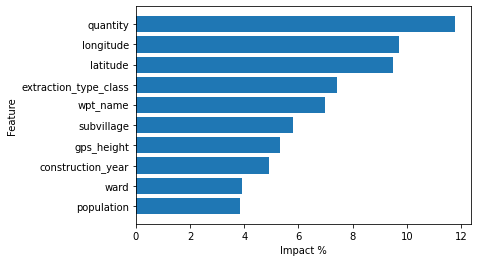

In [65]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
top = pd.Series(model.named_steps['decisiontreeclassifier'].feature_importances_, index=model.named_steps['ordinalencoder'].get_feature_names())
top_ten = top.sort_values(key=(lambda x:abs(x))).tail(10)

plt.barh(top_ten.index, top_ten)
plt.xlabel('Impact %')
plt.ylabel('Feature')
plt.xticks(ticks=[0,0.02,0.04,0.06,0.08,0.1,0.12], labels=['0','2','4','6','8','10','12'])
plt.show()